# CQF Exam 3: Machine Learning

## What are voting classifiers in ensemble learning?

Voting classifiers, in particular, are used for classification tasks and are based on the idea of aggregating the predictions of multiple classifiers to make a final decision. There are two main types of voting classifiers:

1. Hard Voting Classifier:
    In a hard voting classifier, each individual base model (classifier) in the ensemble predicts the class label for a given input. The final prediction is determined by a majority vote among these individual predictions.
2. Soft Voting Classifier:
   In a soft voting classifier, each individual base model predicts the probability or confidence scores for each class. The final prediction is calculated by averaging these probabilities across all the base models and selecting the class with the highest average probability.

## Explain the role of the regularization parameter $C$ in a Support Vector Machine (SVM) model. How does varying $C$ affect the model’s bias and variance trade-off?


Consider the mathematical equation for the solf margin of non linearly separable data $\mathbf{x}_n$, $y_n$:

$$
\begin{array}
{rl}{\min_{w,b,\xi}}&{{\frac{1}{2}}\|{\mathbf{w}}\|^{2} + C \sum_{n=1}^{N}\xi_{n}}
\\\\
{{\mathrm{subject\;to}}}&{y_{n}(\langle{\mathbf{w}},{\mathbf{x}}_{n}\rangle + b)\geqslant1-\xi_{n}}
\\\\
{{}}&{{}\xi_{n}\geqslant0}
\end{array}
$$

Where:
- $w$ is the normal vector of the hyper plane,
- $\mathbf{x}_n$ is the feature vector $n^{th}$
- $y_n$ is the label $n^{th}$
- $\xi_n$ is the slack term that measures the distance of a positive example $x_{+}$ to the positive margin hyperplane $(\langle{\mathbf{w}, \mathbf{x}}\rangle + b = 1)$ when $x_{+}$ is on the wrong side.

The parameter $C > 0$ trades off the size of the margin and the total amount of slack that we have. A large value of $C$ implies low regularization, as we give the slack variables larger weight, hence giving more priority to examples that do not lie on the correct side of the margin.

Let take a look at the impact of $C$ in the model using the breast cancer data from `Scikit-Learn` library.

In [4]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings("ignore")

cancer = load_breast_cancer() 

# The data set is presented in a dictionary form: 
print(cancer.keys()) 


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Now we will extract all features into the new data frame and our target features into separate data frames.

In [188]:
df_feat = pd.DataFrame(cancer['data'], 
					columns = cancer['feature_names']) 

# cancer column is our target 
df_target = pd.DataFrame(cancer['target'], 
					columns =['Cancer']) 

print("Feature Variables: ") 
print(df_feat.info()) 


Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

We will split the training data and the test data using 70:30 ratio

In [189]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( 
						df_feat, np.ravel(df_target), 
				test_size = 0.30, random_state = 101) 


And fit the data to our SVC model. After that we can see the hyperparameters of our model using `get_param()` method.

In [190]:
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 

SVC()

In [191]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The default value of $C$ is 1. Now we can observe the model performace using the confusion matrix.

In [192]:
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Let's change the value of $C=0.001$ and see the result.

In [193]:
# train the model on train set 
model = SVC(C=0.001) 
model.fit(X_train, y_train) 
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



### Conclusion

When $C$ is set to a small value (e.g., close to 0), the SVM places a higher emphasis on maximizing the margin and finding the hyperplane that separates the data points with as few errors as possible. In this case, the model is more tolerant of misclassifications (training errors) and is willing to accept a wider margin with a few support vectors. The model's bias is higher, as it tends to underfit the training data by allowing more training errors, but the variance is lower because it maintains a simpler decision boundary.

When $C$ is set to a large value, the SVM imposes a stronger penalty on misclassified points and strives to minimize training errors, even if it means having a narrower margin and more support vectors. The model's bias is lower because it tries to fit the training data as closely as possible, potentially leading to a more complex decision boundary. However, the variance is higher because the model is sensitive to individual data points, which can result in overfitting.

## Produce a model to predict positive moves (up trend) using machine learning model.

The 7 steps of Machine Learning (ML) workflow:

| Step | Workflow                  | Remark                                                      |
| ---- | ------------------------- | ----------------------------------------------------------- |
| 1    | Ideation                  | Predict positive moves from the given dataset               |
| 2    | Data Collection           | Download the data from Yahoo Finance and store the data set |
| 3    | Exploratory Data Analysis | Study summary statistics                                    |
| 4    | Cleaning Dataset          | Trying to resolve the missing data                          |
| 5    | Transformation            | Perform feature scaling based on EDA                        |
| 6    | Modeling                  | Building and training classification model                  |
| 7    | Metrics                   | Validating the model performance                            |

### STEP 1: Ideation

The objective of the exam is to produce a model to predict a up and down move of the underlying. This is a classification problem, therefore we will tackle this using a classification label `[0]` for a down trend and `[1]` for the up trend. We will use spy 100 ticker for this example and using the data from `2007-10-16` to `2023-10-16`. The reason why I pick the data from this range is because it covers the 2008 financial crash and also 2020 COVID-19 recession.

We are working with the financial timeseries, so the workflow is quite straightforward. After download and store the data, we will explore the data to spot any outliers, create the label and check for imbalance classes. Using features engineering techniques to create new features from the original data and pick the most important feature for our model.

Then we will split the `train` and `test` set, fit and transform the train set and then transform the test set. Doing this will help us avoiding any data leakage.

We will use the confusion matrix and AUC-ROC curve to measure our model performance.

In [1]:
# Data pulling
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    TimeSeriesSplit,
    cross_val_score
)

# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance, to_graphviz

# Metrics
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    roc_auc_score,
    auc
)

from sklearn.metrics import (
    classification_report,
    confusion_matrix
)


### STEP 2: Data Collection

We will use `yfinance` package to download the daily trading data from Yahoo Finance. The recommending data should cover 5 years period which is sufficient. The data is saved in the `.csv` format and can be used later under the name `spy1D.csv`.

In [2]:
# Download data for TSLA and store as csv file
spy = yf.download("SPY", start = '2000-10-16', end = '2023-10-16' , interval='1D')
spy.to_csv('SPY1D.csv')

[*********************100%%**********************]  1 of 1 completed


In [5]:
spy = pd.read_csv('../module_4/SPY1D.csv')

In [6]:
# Verify the downloaded data
spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5785 non-null   object 
 1   Open       5785 non-null   float64
 2   High       5785 non-null   float64
 3   Low        5785 non-null   float64
 4   Close      5785 non-null   float64
 5   Adj Close  5785 non-null   float64
 6   Volume     5785 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.5+ KB


### STEP 3: EDA

### Calculate returns

In [7]:
spy['Returns'] = np.log(spy['Adj Close']).diff()

#### Feature Specify

In [8]:
# Create features (predictors) list
features_list = []
# Intraday price range
spy['OC'] = spy['Open'] - spy['Close']
spy['HL'] = spy['High'] - spy['Low']
# Sign of return or momentum
spy['Sign'] = np.sign(spy.Returns)

# Append feature list
features_list.append('OC')
features_list.append('HL')
features_list.append('Sign')

# Pass Returns, Volatility
for r in range(10, 65, 5):
    spy['Ret_'+str(r)] = spy.Returns.rolling(r).sum()
    spy['Std_'+str(r)] = spy.Returns.rolling(r).std()
    spy['SMA_'+str(r)] = spy['Adj Close'].rolling(r).mean()
    features_list.append('Ret_'+str(r))
    features_list.append('Std_'+str(r))
    features_list.append('SMA_'+str(r))

for a in range(5, 200, 5):
    spy['EMA_'+str(a)] = spy['Adj Close'].ewm(span = a).mean()
    features_list.append('EMA_'+str(r))


# Drop NaN values
spy.dropna(inplace=True)

#### Define target

We set the target variable is whether `spy` price will close up or down on the next trading day. If the tomorrow’s closing price is greater than today’s closing price by `5%`, then we will buy the `spy`, else we will sell `spy`.

We assign a value of `1` for the buy signal and `0` otherwise to target variable. The target can be described as:

$$
y_t = 
\begin{cases} 
1, & \text{If} \quad p_{t+1} > 0.995 \times p_t  \\ 
0, & \text{Otherwise}
\end{cases}
$$

In [9]:
# Define Target
spy['Target'] = np.where(spy['Adj Close'].shift(-1)>0.995 * spy['Adj Close'],1,0)
# Check output
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,OC,HL,...,EMA_155,EMA_160,EMA_165,EMA_170,EMA_175,EMA_180,EMA_185,EMA_190,EMA_195,Target
60,2001-01-11,131.09375,133.484375,131.093750,132.250000,86.616783,7245100,0.000946,-1.156250,2.390625,...,88.155062,88.168396,88.180941,88.192767,88.203931,88.214487,88.224484,88.233963,88.242965,1
61,2001-01-12,132.68750,133.718750,131.281250,132.000000,86.453041,7244000,-0.001892,0.687500,2.437500,...,88.115436,88.128884,88.141540,88.153471,88.164738,88.175393,88.185486,88.195058,88.204149,1
62,2001-01-16,132.00000,133.187500,131.515625,132.843750,87.005646,8542200,0.006372,-0.843750,1.671875,...,88.089866,88.103283,88.115913,88.127824,88.139075,88.149718,88.159801,88.169367,88.178454,1
63,2001-01-17,134.84375,135.046875,132.640625,133.453125,87.404762,7851400,0.004577,1.390625,2.406250,...,88.074241,88.087525,88.100036,88.111838,88.122990,88.133543,88.143544,88.153034,88.162051,1
64,2001-01-18,133.43750,135.703125,132.937500,134.781250,88.274574,8107000,0.009902,-1.343750,2.765625,...,88.078765,88.091702,88.103893,88.115399,88.126276,88.136573,88.146335,88.155602,88.164410,0


Before moving further, I am going to split the data into the `train_set` and `test_set` and only do EDA and cleaning on the `train_set` to prevend any data leakage from the EDA process.

In [10]:
# Copy the original data
data = spy.copy().set_index('Date')

In [11]:
# Convert to NumPy
X = data.drop(['Open', 'Close', 'High', 'Low', 'Adj Close', 'Returns', 'Volume', 'Target'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5725 entries, 2001-01-11 to 2023-10-13
Data columns (total 75 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OC       5725 non-null   float64
 1   HL       5725 non-null   float64
 2   Sign     5725 non-null   float64
 3   Ret_10   5725 non-null   float64
 4   Std_10   5725 non-null   float64
 5   SMA_10   5725 non-null   float64
 6   Ret_15   5725 non-null   float64
 7   Std_15   5725 non-null   float64
 8   SMA_15   5725 non-null   float64
 9   Ret_20   5725 non-null   float64
 10  Std_20   5725 non-null   float64
 11  SMA_20   5725 non-null   float64
 12  Ret_25   5725 non-null   float64
 13  Std_25   5725 non-null   float64
 14  SMA_25   5725 non-null   float64
 15  Ret_30   5725 non-null   float64
 16  Std_30   5725 non-null   float64
 17  SMA_30   5725 non-null   float64
 18  Ret_35   5725 non-null   float64
 19  Std_35   5725 non-null   float64
 20  SMA_35   5725 non-null   float64
 21  Ret_

In [13]:
# Define label or target
y = data['Target']
y

Date
2001-01-11    1
2001-01-12    1
2001-01-16    1
2001-01-17    1
2001-01-18    0
             ..
2023-10-09    1
2023-10-10    1
2023-10-11    0
2023-10-12    1
2023-10-13    0
Name: Target, Length: 5725, dtype: int64

In [91]:
# Splitting the datasets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 4580, 1145


#### Imbalance class

In [15]:
# class frequency
c = y_train.value_counts()
c

1    3511
0    1069
Name: Target, dtype: int64

The label is imbalance so we have to address this problem

In [16]:
# class weight function
def cwts(label):
    c0, c1 = np.bincount(label)
    w0=(1/c0)*(len(label))/2 
    w1=(1/c1)*(len(label))/2 
    return {0: w0, 1: w1}

In [17]:
# check class weights
class_weight = cwts(y_train)
class_weight

{0: 2.1421889616463985, 1: 0.6522358302477926}

#### Multi collinearity features

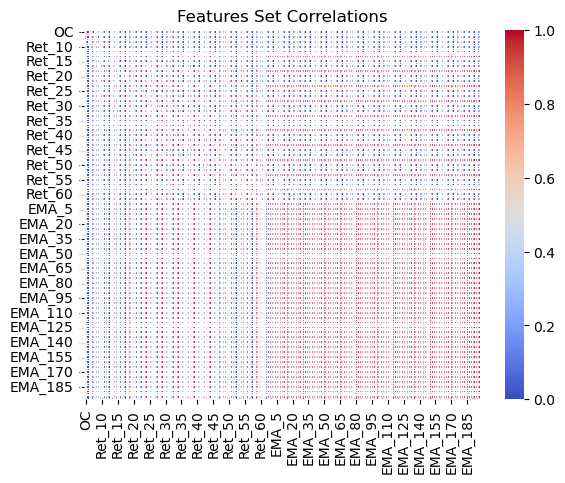

In [26]:
# remove features that are highly correlated
sns.heatmap(X_train.corr()>0.9,
            annot=True,
            annot_kws={"size": 8},
            fmt=".2f",
            linewidth=.5,
            cmap="coolwarm",
            cbar=True); #cmap="crest", virids, magma

plt.title('Features Set Correlations');

We have detect some multi collinearity features in our model. We will drop these column later.

Let's see the feature scale:

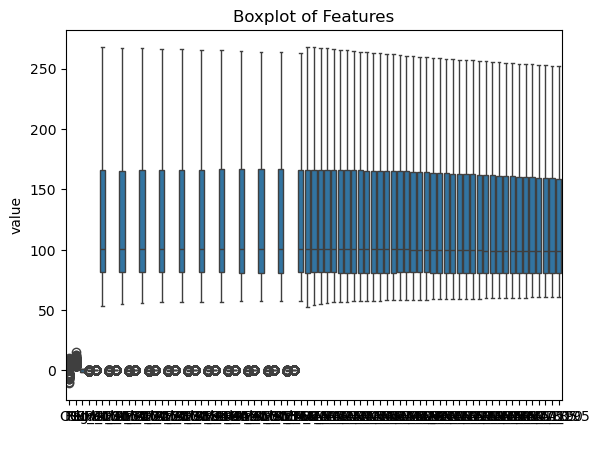

In [27]:
# study the distribution
# fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='variable', y='value', data=pd.melt(X_train))
plt.xlabel(' ')
plt.title('Boxplot of Features');

There are some feature with very high value vesus the rest. We will use `minmaxscaler()` method for these features.

### STEP 4: Cleaning Data

From our EDA process, we found out about our multicolliearity problem. We will build a data wrangle function to drop multicolliearity features:

In [37]:
# remove the first feature that is correlated with any other feature
def correlated_features(data, threshold=0.9):
    col_corr = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
# Get the list of remaining features
drop_correlated_features = correlated_features(X_train)

In [39]:
# drop the highly correlated features
X_train_drop = X_train.drop(drop_correlated_features, axis=1)
X_train_drop.describe()

,OC,HL,Sign,Ret_10,Std_10,SMA_10,Ret_15,Ret_20,Ret_25,Ret_30
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,-0.007097,1.807921,0.093668,0.002421,0.009823,122.256297,0.003637,0.004811,0.005977,0.007159
std,1.305278,1.254909,0.993626,0.032952,0.006961,55.972439,0.040053,0.045859,0.050973,0.055688
min,-10.209991,0.299995,-1.000000,-0.311548,0.001264,53.753542,-0.338247,-0.348222,-0.368128,-0.380221
25%,-0.660004,1.040001,-1.000000,-0.011886,0.005493,81.219506,-0.013270,-0.015291,-0.016630,-0.015880
50%,-0.080002,1.479996,1.000000,0.006033,0.008073,100.691751,0.009031,0.012047,0.014348,0.015467
75%,0.582512,2.152504,1.000000,0.020371,0.011884,165.782508,0.026231,0.030995,0.036518,0.039751
max,10.380005,15.080002,1.000000,0.195406,0.069773,267.912955,0.196093,0.212051,0.228064,0.242755


In [40]:
X_test_drop = X_test.drop(drop_correlated_features, axis=1)

### STEP 5: Transformation

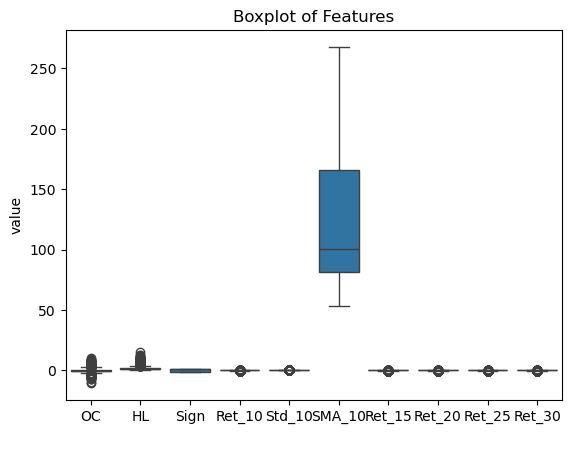

In [41]:
# study the distribution
# fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='variable', y='value', data=pd.melt(X_train_drop))
plt.xlabel(' ')
plt.title('Boxplot of Features');

The only remaining feature with high value is `SMA_10`, we will scale this using `MinMaxScaler()`

In [42]:
from sklearn.compose import ColumnTransformer
cols = ['SMA_10']
scaler = MinMaxScaler()
preprocessing = ColumnTransformer([
    ('cols', scaler, cols)
])

In [43]:
# Fit and transform the data
train_cols_scaled = preprocessing.fit_transform(X_train_drop)

In [44]:
test_cols_scaled = preprocessing.transform(X_test_drop)

In [45]:
X_train_scaled = pd.DataFrame(
    train_cols_scaled, columns=preprocessing.get_feature_names_out(),
    index=X_train_drop.index)

X_test_scaled = pd.DataFrame(
    test_cols_scaled, columns=preprocessing.get_feature_names_out(),
    index=X_test_drop.index)

In [46]:
X_train_scaled.describe()

,cols__SMA_10
count,4580.000000
mean,0.319868
std,0.261359
min,0.000000
25%,0.128250
50%,0.219174
75%,0.523110
max,1.000000


In [47]:
X_test_scaled.describe()

,cols__SMA_10
count,1145.000000
mean,1.448058
std,0.294674
min,0.822237
25%,1.159262
50%,1.518243
75%,1.701319
max,1.905296


In [48]:
for col in cols:
    X_train_droped_scaled = X_train_drop
    X_test_droped_scaled = X_test_drop
    X_train_droped_scaled[col] = X_train_scaled[f'cols__{col}']
    X_test_droped_scaled[col] = X_test_scaled[f'cols__{col}']

In [49]:
X_train_droped_scaled.describe()

,OC,HL,Sign,Ret_10,Std_10,SMA_10,Ret_15,Ret_20,Ret_25,Ret_30
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,-0.007097,1.807921,0.093668,0.002421,0.009823,0.319868,0.003637,0.004811,0.005977,0.007159
std,1.305278,1.254909,0.993626,0.032952,0.006961,0.261359,0.040053,0.045859,0.050973,0.055688
min,-10.209991,0.299995,-1.000000,-0.311548,0.001264,0.000000,-0.338247,-0.348222,-0.368128,-0.380221
25%,-0.660004,1.040001,-1.000000,-0.011886,0.005493,0.128250,-0.013270,-0.015291,-0.016630,-0.015880
50%,-0.080002,1.479996,1.000000,0.006033,0.008073,0.219174,0.009031,0.012047,0.014348,0.015467
75%,0.582512,2.152504,1.000000,0.020371,0.011884,0.523110,0.026231,0.030995,0.036518,0.039751
max,10.380005,15.080002,1.000000,0.195406,0.069773,1.000000,0.196093,0.212051,0.228064,0.242755


In [222]:
X_test_droped_scaled.describe()

,OC,HL,Sign,Ret_10,Std_10,SMA_10,Ret_15,Ret_20,Ret_25,Ret_30
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,0.524248,0.149256,0.072174,0.000365,0.009541,0.839278,0.000633,0.000952,0.001175,0.001356
std,0.091264,0.109117,0.997390,0.036174,0.006456,0.134641,0.044237,0.050961,0.056446,0.060609
min,-0.025292,0.019114,-1.000000,-0.293785,0.002312,0.409568,-0.350569,-0.383724,-0.397753,-0.399581
25%,0.477019,0.084477,-1.000000,-0.014811,0.005516,0.802248,-0.016059,-0.018388,-0.021197,-0.019783
50%,0.518604,0.118853,1.000000,0.003293,0.007860,0.881127,0.004671,0.006281,0.007642,0.007358
75%,0.563929,0.177445,1.000000,0.019145,0.011637,0.932709,0.023047,0.027500,0.030207,0.033008
max,1.301436,1.165337,1.000000,0.133807,0.056785,1.045282,0.134292,0.144559,0.202577,0.171583


### STEP 6: Modeling

Stacking Ensemble

In [50]:
# cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [51]:
# specify estimators
dtc = DecisionTreeClassifier(class_weight=class_weight)
rfc = RandomForestClassifier(class_weight=class_weight)
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(scale_pos_weight=(y_train/class_weight[1]))

In [83]:
# get cv score
clf = [dtc,rfc,knn,gbc,xgb]
for estimator in clf:
    score = cross_val_score(estimator, X_train, y_train, scoring = 'accuracy', cv=tscv, n_jobs=-1)
    print(f"The accuracy score of {estimator} is: {score.mean()}")

The accuracy score of DecisionTreeClassifier(class_weight={0: 2.1421889616463985,
                                     1: 0.6522358302477926}) is: 0.5528178243774574
The accuracy score of RandomForestClassifier(class_weight={0: 2.1421889616463985,
                                     1: 0.6522358302477926}) is: 0.6975098296199214
The accuracy score of KNeighborsClassifier() is: 0.5310615989515072
The accuracy score of GradientBoostingClassifier() is: 0.5344692005242464
The accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=No

Hyper parameters tuning

- learning rate: step size shrinkage used in update to prevents overfitting. Range is [0,1].
- max_depth: maximum depth of a tree.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- min_child_weight: minimum sum of instance weight needed in a child.
- gamma: minimum loss reduction required to make a further partition on a leaf node of the
tree. Large gamma will lead to more conservative algorithm.
- lambda: L2 regularization term on weights. Increasing this value will make model more
conservative. Normalised to number of training examples. [parameter for linear booster].

In [84]:
# Cross validation score
score = cross_val_score(xgb,X_train,y_train,cv=tscv)
print(f'Mean CV Score : {score.mean():0.4}')

Mean CV Score : 0.606


Optimize for XGB

In [85]:
# Hyper parameter optimization
param_grid = {  'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.125],
                'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                'min_child_weight': [5, 10, 15, 20, 25, 30],
                'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5],
                'colsample_bytree': [0.3, 0.4, 0.5 , 0.7],
                'max_delta_step': [2,4,6,8,10]
            }

In [87]:
# perform random search
rs = RandomizedSearchCV(xgb, param_grid, n_iter=100, scoring='f1', cv=tscv, verbose=0)
rs.fit(X_train, y_train, verbose=0)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.125],
                                        'max_delta_step': [2, 4, 6, 8, 10],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [5, 10, 15, 20, 25,
                                                             30]},
                   scoring='f1')

In [88]:
rs.best_params_

{'min_child_weight': 15,
 'max_depth': 5,
 'max_delta_step': 2,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [93]:
# Refit the XGB Classifier with the best params
cls = XGBClassifier(**rs.best_params_,scale_pos_weight=(class_weight[0]/class_weight[1]))
cls.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    # eval_metric='logloss',
    verbose=True
    )

[0]	validation_0-logloss:0.65072	validation_1-logloss:0.65989
[1]	validation_0-logloss:0.61769	validation_1-logloss:0.63120
[2]	validation_0-logloss:0.59206	validation_1-logloss:0.60861
[3]	validation_0-logloss:0.57214	validation_1-logloss:0.59219
[4]	validation_0-logloss:0.55668	validation_1-logloss:0.57985
[5]	validation_0-logloss:0.54518	validation_1-logloss:0.57250
[6]	validation_0-logloss:0.53627	validation_1-logloss:0.56613
[7]	validation_0-logloss:0.52962	validation_1-logloss:0.56230
[8]	validation_0-logloss:0.52502	validation_1-logloss:0.55997
[9]	validation_0-logloss:0.52216	validation_1-logloss:0.55958
[10]	validation_0-logloss:0.51995	validation_1-logloss:0.56070
[11]	validation_0-logloss:0.51896	validation_1-logloss:0.56258
[12]	validation_0-logloss:0.51935	validation_1-logloss:0.56484
[13]	validation_0-logloss:0.51997	validation_1-logloss:0.56618
[14]	validation_0-logloss:0.52099	validation_1-logloss:0.57046
[15]	validation_0-logloss:0.52191	validation_1-logloss:0.57471
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=2, max_depth=5, max_leaves=0, min_child_weight=15,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
# Cross validation score
score = cross_val_score(cls,X_train_droped_scaled,y_train,cv=tscv)
print(f'Mean CV Score : {score.mean():0.4}')

Mean CV Score : 0.7856


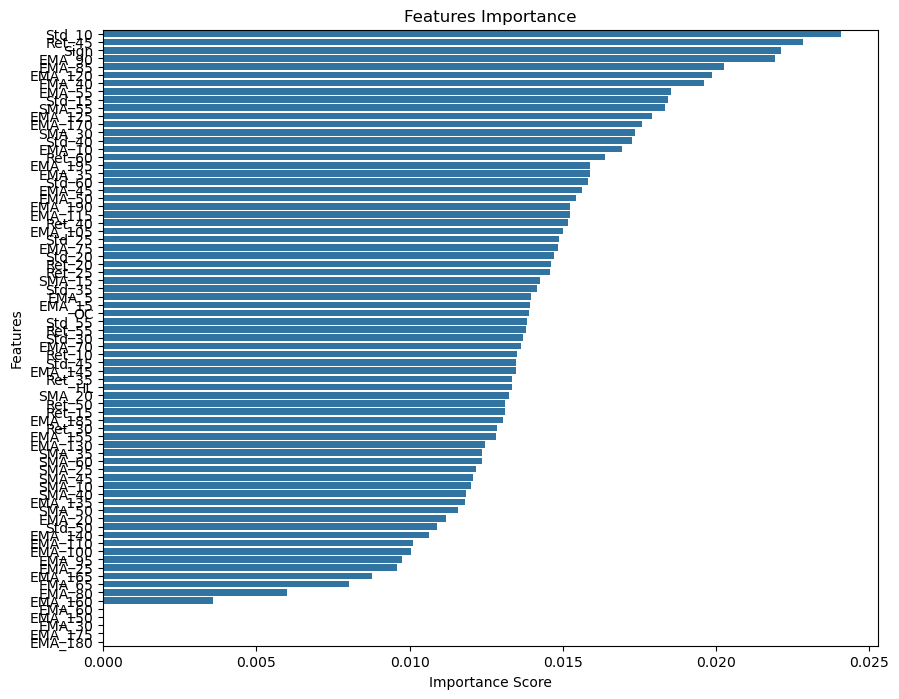

In [96]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10,8))
feature_imp = pd.DataFrame({'Importance Score': cls.feature_importances_,'Features': X_train.columns}).sort_values(by='Importance Score', ascending=False)
sns.barplot(x=feature_imp['Importance Score'], y=feature_imp['Features'])
ax.set_title('Features Importance');

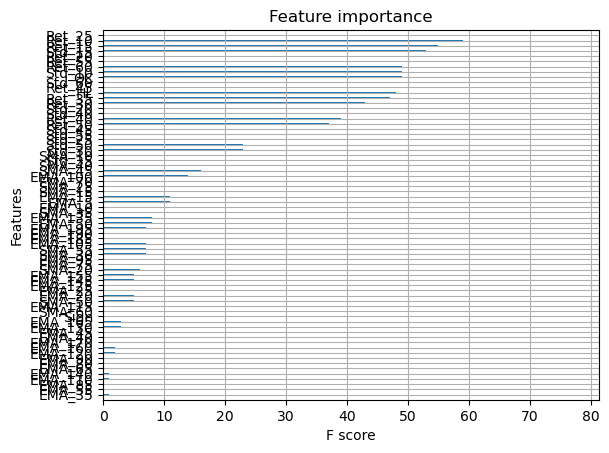

In [97]:
# feature importance_type = 'gain'
plot_importance(cls, importance_type='weight', show_values=False);

In [98]:
import shap
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X_train)

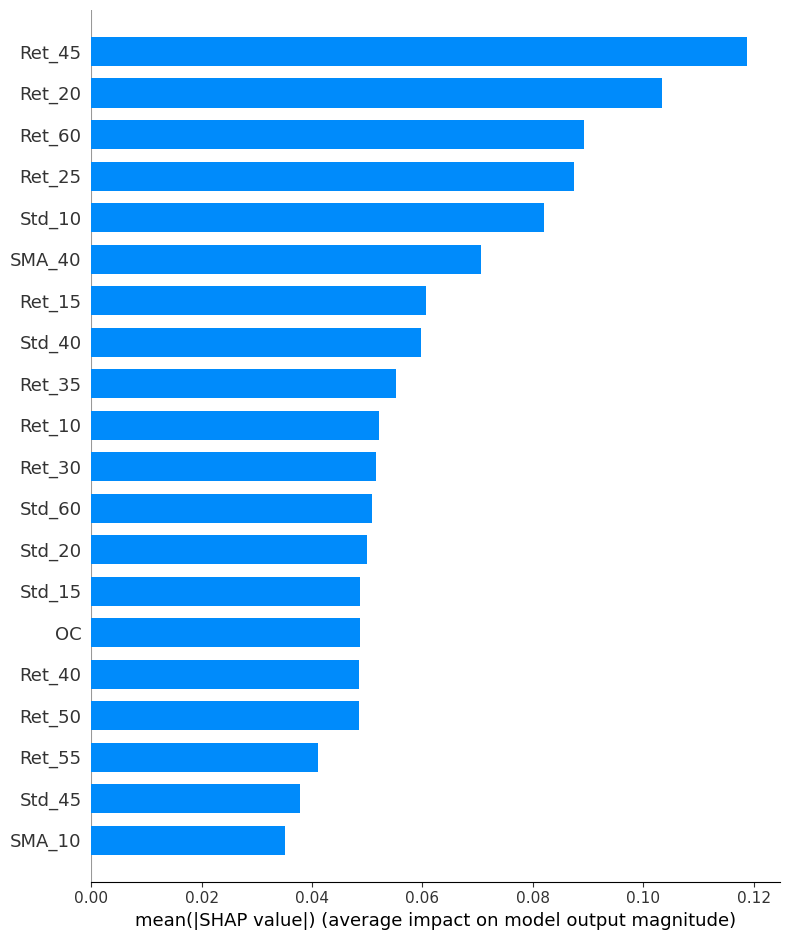

In [99]:
# future importance summary
shap.summary_plot(shap_values, X_test, plot_type="bar")

IndexError: index 2156 is out of bounds for axis 0 with size 1145

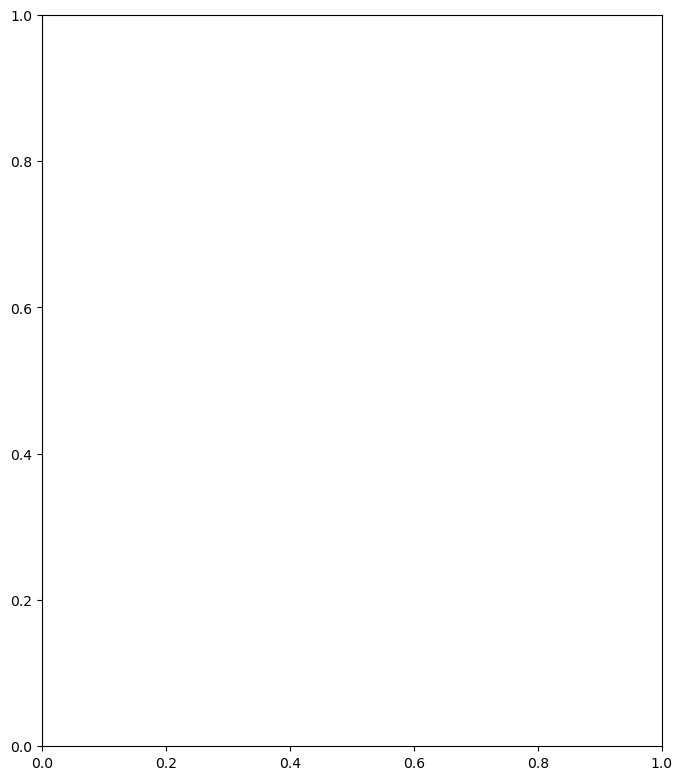

In [100]:
# interpretation plot
shap.summary_plot(shap_values, X_test)

In [101]:
# Predicting the test dataset
y_pred = cls.predict(X_test)
# Measure Accuracy
acc_train = accuracy_score(y_train, cls.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
# Print Accuracy
print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t: {acc_test :0.4}')


 Training Accuracy 	: 0.7677 
 Test Accuracy 		: 0.7389


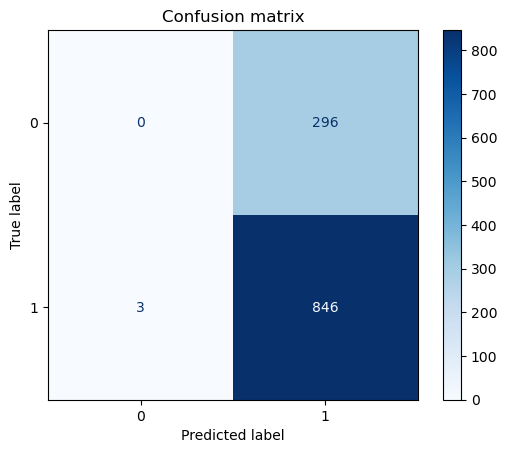

In [102]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        cls,
        X_test,
        y_test,
        display_labels=cls.classes_,
        cmap=plt.cm.Blues
    )   
disp.ax_.set_title('Confusion matrix')
plt.show()

In [81]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       296
           1       0.74      1.00      0.85       849

    accuracy                           0.74      1145
   macro avg       0.87      0.50      0.43      1145
weighted avg       0.81      0.74      0.63      1145



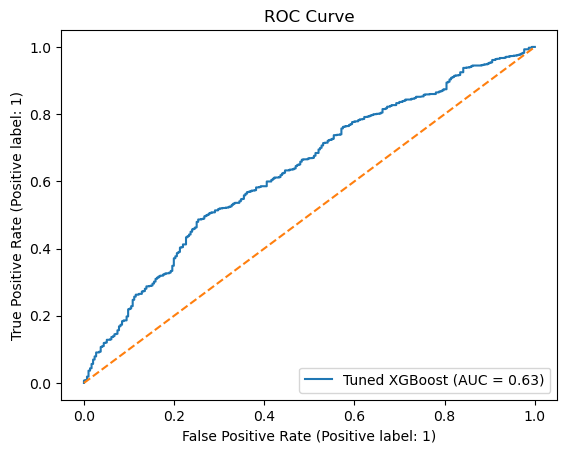

In [82]:
# Display ROCCurve
disp_roc = RocCurveDisplay.from_estimator(
        cls,
        X_test_droped_scaled,
        y_test,
        name='Tuned XGBoost')
disp_roc.ax_.set_title('ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.show()